# Iris dataset

In [2]:
import numpy as np


In [31]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
data=pd.read_csv("iris.csv",header=None)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [11]:
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
X=pd.DataFrame(data.iloc[:,0:3].values)
X.head()

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [26]:
y=pd.DataFrame(data.iloc[:,4].values)
y.head()

,0
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# K_means clustering



In [33]:
import sklearn


In [38]:
from sklearn.cluster import KMeans


#### Using the elbow method to find the optimal number of clusters

In [42]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

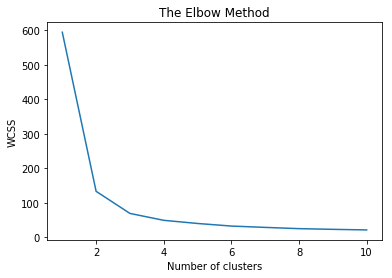

In [40]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Since it shows 3 at the elbow train the model with clusters=3

###### Train the model

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

###### Predict the clusters_set

In [80]:
y_kmeans = kmeans.predict(X)

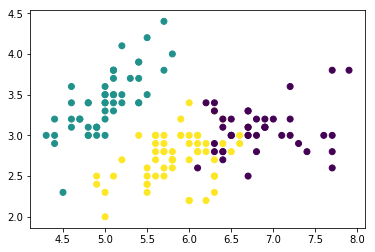

In [89]:
plt.scatter(X[0],X[1],c=y_kmeans, cmap='viridis')


# K Nearest Neighbour algorithm


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


###### Create Classifier and train the model.

In [95]:

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


/home/shailygupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

###### Make Prediction

In [97]:
y_pred = classifier.predict(X_test)

#### Confusion Matrix for evaluation


In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]])

#### Accuracy Score:Another Evaluation Matrix

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=False)


28